## Confidence Interval

#### A/B Test Example 

Considering WeChat wants to use algorithms to rank the feeds on WeChat Moments instead of showing the organic feeds chronologically.

**We are testing the two approaches to rank the feeds:** 

Control Group: show feeds chronologically

Treatment Group: Rank feeds with algorithms

Metric (#days): the number of days that a user clicks any feeds on WeChat Moments during the recent 30 days. 

**Objective**: Find the confidence interval of $\delta$ = $\mu_1$ - $\mu_0$ and decide whether it is significantly larger than 0.

**CI**: CI represents how often (e.g., 95%) the CI should contain the true Treatment Effects (difference between treatment and control).

In [10]:
import numpy as np, statsmodels.stats.api as sms
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import random
from sklearn import preprocessing

In [11]:
#population characteristics
lift = 1.1
ctr0=0.5
ctr1=lift*ctr0
# mean = n*p (n=30)
mu0=30*ctr0
mu1=30*ctr1
delta_p = mu1-mu0
print(delta_p)

1.5


In [12]:
#sample characteristics
# we draw the sample
ctrl = np.random.binomial(30, p=ctr0, size=1000) * 1.0
test = np.random.binomial(30, p=ctr1, size=1000) * 1.0
delta_s = np.mean(test)-np.mean(ctrl)
print(delta_s)

1.3790000000000013


In [13]:
se0 = np.std(ctrl)
se1 = np.std(test)
print(se0,se1)

2.720374790355182 2.675518641310503


In [14]:
cm = sms.CompareMeans(sms.DescrStatsW(test), sms.DescrStatsW(ctrl))

In [15]:
print(cm.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='unequal'))
print(cm.zconfint_diff(alpha=0.05, alternative='two-sided', usevar='unequal'))

(1.1422489254698085, 1.6157510745301942)
(1.1423923846126793, 1.6156076153873233)


### Compare CIs, k=100, 1000, 2000, 5000

In [7]:
def ci_sample_size(n):
    ctrl = np.random.binomial(30, p=ctr0, size=n) * 1.0
    test = np.random.binomial(30, p=ctr0*lift, size=n) * 1.0
    cm = sms.CompareMeans(sms.DescrStatsW(test), sms.DescrStatsW(ctrl))
    x,y = cm.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='unequal')
    return (x,y)

In [8]:
size = [50,1000,2000,100000]
ci_lower=[]
ci_upper=[]

In [9]:
for i in size:
    print(ci_sample_size(i))
    ci_lower.append(ci_sample_size(i)[0])
    ci_upper.append(ci_sample_size(i)[1])

(0.0447351492565613, 2.155264850743438)
(1.0227458222717214, 1.5092541777282786)
(1.0939559051256076, 1.4320440948743887)
(1.4748116305281684, 1.5226283694718326)


In [10]:
data_dict = {}
data_dict['lower'] = [x for x in ci_lower]
data_dict['upper'] = [x for x in ci_upper]
data_dict['size']=[x for x in size]
dataset = pd.DataFrame(data_dict)

Text(0, 0.5, 'Sample Size')

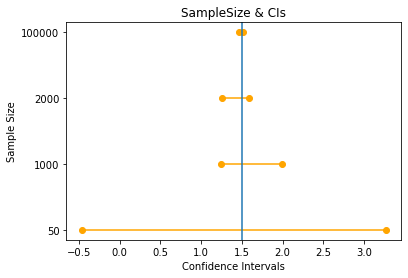

In [11]:
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.axvline(x=delta_p)
plt.yticks(range(len(dataset)),list(dataset['size']))
plt.title('SampleSize & CIs')
plt.xlabel('Confidence Intervals')
plt.ylabel('Sample Size')

### CI and Type I Error

CIs for testing the same variable ($\delta$) based on different samples. Draw 25 samples from the population. Show the CIs and interpret Type I error by the results.

In [12]:
#population 
lift2 = 1.1
std = 0.2
mean = 5
delta_p2=5*(lift2-1)
print(delta_p2)

0.5000000000000004


In [20]:
ci=[]
for i in range(20):
    ctrl = np.random.normal(5,std,1000)
    test = np.random.normal(5*lift2,std, 1000)
    cm = sms.CompareMeans(sms.DescrStatsW(test), sms.DescrStatsW(ctrl))
    x,y = cm.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='unequal')
    ci.append((x,y))

In [21]:
data_dict = {}
data_dict['Number'] = [x for x in range(20)]
data_dict['lower'] = [x[0] for x in ci]
data_dict['upper'] = [x[1] for x in ci]
dataset = pd.DataFrame(data_dict)  
print(dataset)

    Number     lower     upper
0        0  0.480556  0.515585
1        1  0.492531  0.527923
2        2  0.487024  0.521639
3        3  0.490352  0.525666
4        4  0.496746  0.532386
5        5  0.457623  0.492577
6        6  0.482577  0.517819
7        7  0.501737  0.536818
8        8  0.480479  0.515723
9        9  0.482137  0.517534
10      10  0.483448  0.518725
11      11  0.493172  0.527980
12      12  0.471214  0.507093
13      13  0.475970  0.512398
14      14  0.465279  0.501072
15      15  0.480083  0.515361
16      16  0.487442  0.522472
17      17  0.478996  0.514368
18      18  0.491380  0.526660
19      19  0.469840  0.504135


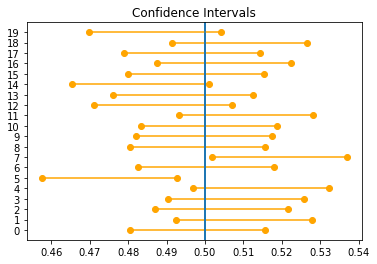

In [22]:
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
    plt.yticks(range(len(dataset)),list(dataset['Number']))
    plt.axvline(delta_p2)
plt.title('Confidence Intervals')
plt.savefig("CIMean0.png")

### Bootstrap CIs

https://github.com/facebookarchive/bootstrapped

In [16]:
pip install bootstrapped

Note: you may need to restart the kernel to use updated packages.


In [2]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

In [17]:
ctrl = np.array(ctrl)
test = np.array(test)

**Compare Mean Difference: value change & percent change**

In [18]:
print(bs.bootstrap_ab(
    test, 
    ctrl, 
    stat_func=bs_stats.mean,
    compare_func=bs_compare.difference,
    alpha=0.05))

1.3790000000000013    (1.1380000000000035, 1.6240000000000006)


In [19]:
print(bs.bootstrap_ab(
    test, 
    ctrl, 
    stat_func=bs_stats.mean,
    compare_func=bs_compare.percent_change,
    alpha=0.05))

9.14395597108946    (7.492608721343869, 10.771821298348328)


**Compare Median Difference: value change & percent change**

In [20]:
print(bs.bootstrap_ab(
    test, 
    ctrl, 
    stat_func=bs_stats.median,
    compare_func=bs_compare.difference,
    alpha=0.05))

2.0    (2.0, 3.0)


In [21]:
print(bs.bootstrap_ab(
    test, 
    ctrl, 
    stat_func=bs_stats.median,
    compare_func=bs_compare.percent_change,
    alpha=0.05))

13.333333333333334    (13.333333333333334, 20.0)


**Compare Standard Errors Difference: value change & percent change**

In [22]:
print(bs.bootstrap_ab(
    test, 
    ctrl, 
    stat_func=bs_stats.std,
    compare_func=bs_compare.difference,
    alpha=0.05))

-0.044856149044678606    (-0.21680099414147444, 0.12374627150013212)


In [23]:
print(bs.bootstrap_ab(
    test, 
    ctrl, 
    stat_func=bs_stats.std,
    compare_func=bs_compare.percent_change,
    alpha=0.05))

-1.6488959243304129    (-8.015358620926206, 4.234015978126974)


**Compare SUM Difference: value change & percent change**

In [24]:
print(bs.bootstrap_ab(
    test, 
    ctrl, 
    stat_func=bs_stats.sum,
    compare_func=bs_compare.difference,
    alpha=0.05))

1379.0    (1142.9750000000004, 1614.0)


In [25]:
print(bs.bootstrap_ab(
    test, 
    ctrl, 
    stat_func=bs_stats.sum,
    compare_func=bs_compare.percent_change,
    alpha=0.05))

9.14395597108945    (7.531300354398173, 10.795311231116987)
